In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('ch_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24337 entries, 0 to 24336
Data columns (total 10 columns):
CUSTOMER_ID         24337 non-null int64
ORDERS              24337 non-null int64
FIRST_ORDER_DATE    24337 non-null object
LAST_ORDER_DATE     24337 non-null object
TOTAL_CM2           24337 non-null object
NET_SALES           24337 non-null object
CM2_REL             24337 non-null object
ZTQ_ID              24337 non-null int64
START_DATE          24337 non-null object
EXPIRY_DATE         24337 non-null object
dtypes: int64(3), object(7)
memory usage: 1.9+ MB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,3496607,13,2017-06-18,2018-04-28,323.8149,928.3475,34.88,52,2017-08-13,2020-08-13
1,9290374,23,2017-06-01,2018-05-28,165.9035,1341.1022,12.37,52,2017-07-27,2020-08-24
2,7460546,8,2017-06-23,2018-05-15,125.5485,678.9839,18.49,52,2014-08-30,2017-08-30
3,7404461,9,2017-07-21,2018-05-01,117.4960,608.5094,19.31,54,2018-01-22,2021-01-22
4,7732773,3,2017-06-23,2018-03-01,69.1251,212.9312,32.46,52,2017-11-01,2020-11-27


In [11]:
tiers = [51, 52, 53, 54, 55, 56]

...........................................................TIER  51 ..........................................................


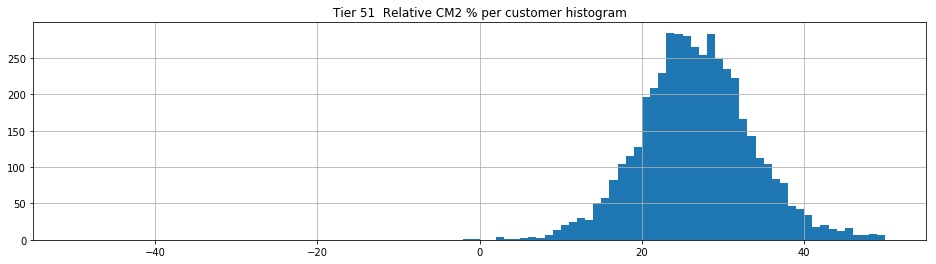

,CM2_REL
count,4600.00
mean,26.72
std,7.12
min,-79.09
25%,22.32
50%,26.52
75%,31.00
max,53.78


CM2% threshold >= 5  is the percentile 0.2
CM2% threshold >= 7  is the percentile 0.33
CM2% threshold >=  23.21  is the percentile 30 allowing us to stay with the 70% of our sample


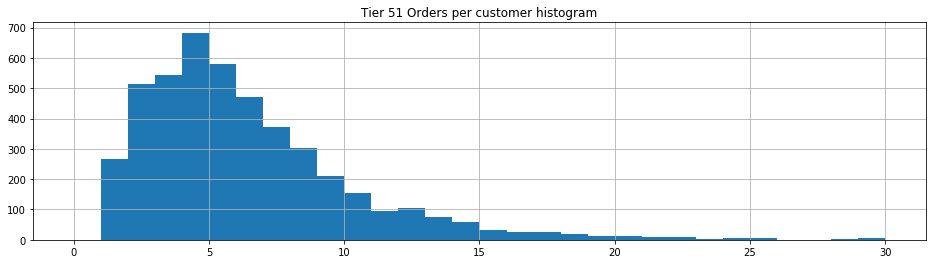

,ORDERS
count,4600.00
mean,5.91
std,4.12
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,70.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  71.17  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  71.13  % from our customers
With CM2% threshold >=  23.21  and Orders >=  4.0  we keep eligible a  50.61  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


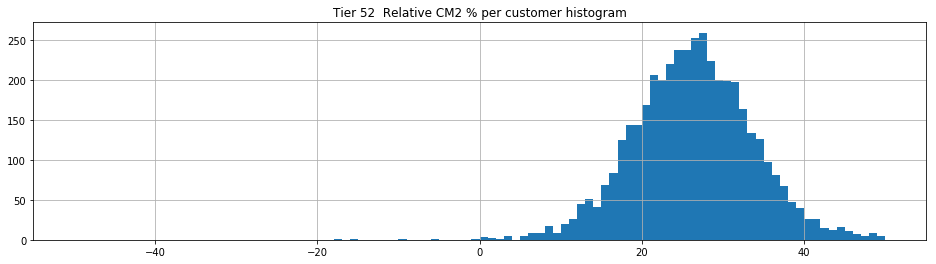

,CM2_REL
count,4310.00
mean,26.31
std,7.50
min,-17.09
25%,21.44
50%,26.30
75%,31.08
max,57.20


CM2% threshold >= 5  is the percentile 0.39
CM2% threshold >= 7  is the percentile 0.7
CM2% threshold >=  22.5  is the percentile 30 allowing us to stay with the 70% of our sample


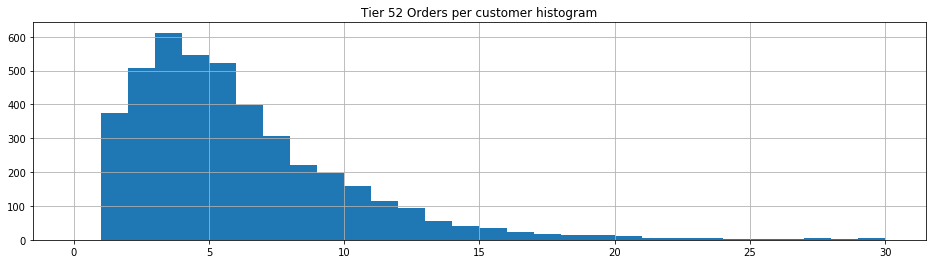

,ORDERS
count,4310.00
mean,5.70
std,4.43
min,1.00
25%,3.00
50%,5.00
75%,7.00
max,91.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  79.44  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  79.33  % from our customers
With CM2% threshold >=  22.5  and Orders >=  3.0  we keep eligible a  56.52  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


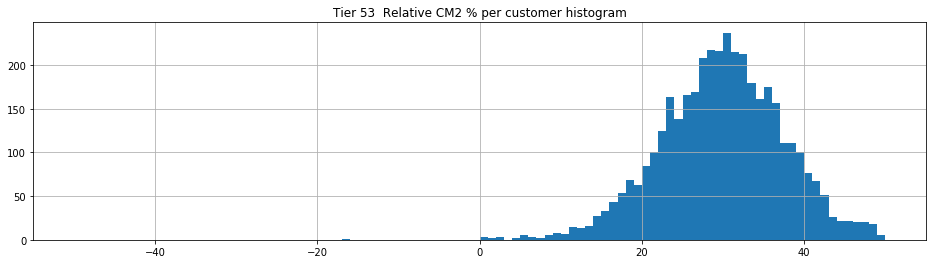

,CM2_REL
count,3969.00
mean,29.74
std,15.61
min,-824.28
25%,25.04
50%,30.11
75%,35.06
max,59.51


CM2% threshold >= 5  is the percentile 0.3
CM2% threshold >= 7  is the percentile 0.5
CM2% threshold >=  26.194  is the percentile 30 allowing us to stay with the 70% of our sample


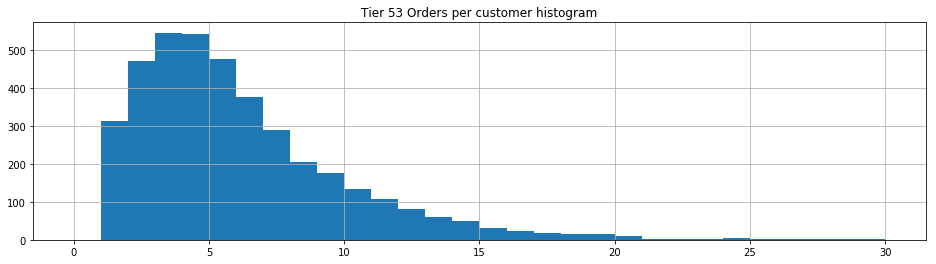

,ORDERS
count,3969.00
mean,5.72
std,4.15
min,1.00
25%,3.00
50%,5.00
75%,7.00
max,39.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  80.22  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  80.2  % from our customers
With CM2% threshold >=  26.194  and Orders >=  3.0  we keep eligible a  57.7  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


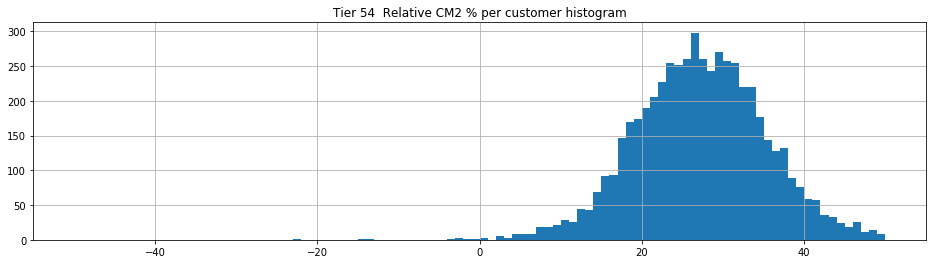

,CM2_REL
count,5466.00
mean,27.31
std,8.24
min,-22.20
25%,21.89
50%,27.17
75%,32.56
max,69.97


CM2% threshold >= 5  is the percentile 0.49
CM2% threshold >= 7  is the percentile 0.82
CM2% threshold >=  23.115000000000002  is the percentile 30 allowing us to stay with the 70% of our sample


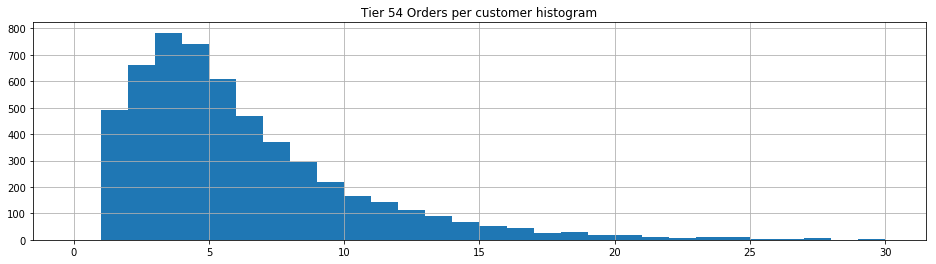

,ORDERS
count,5466.00
mean,5.76
std,4.50
min,1.00
25%,3.00
50%,5.00
75%,7.00
max,68.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  78.76  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  78.54  % from our customers
With CM2% threshold >=  23.115000000000002  and Orders >=  3.0  we keep eligible a  56.4  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


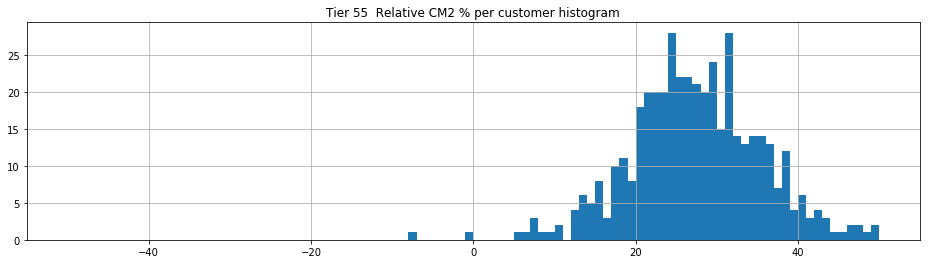

,CM2_REL
count,441.00
mean,27.43
std,8.21
min,-7.32
25%,22.43
50%,27.30
75%,32.30
max,60.68


CM2% threshold >= 5  is the percentile 0.45
CM2% threshold >= 7  is the percentile 0.91
CM2% threshold >=  23.4  is the percentile 30 allowing us to stay with the 70% of our sample


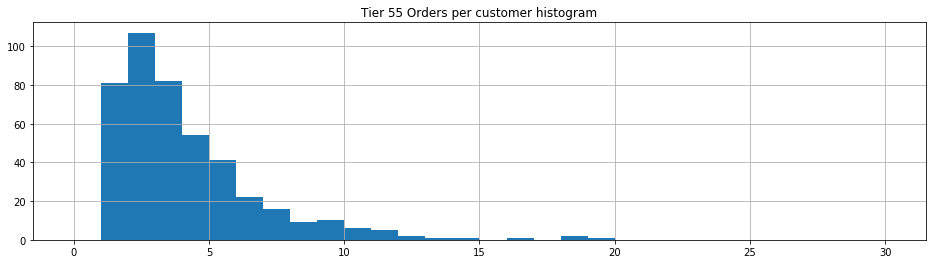

,ORDERS
count,441.00
mean,3.64
std,2.77
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,19.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  81.41  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  81.18  % from our customers
With CM2% threshold >=  23.4  and Orders >=  2.0  we keep eligible a  58.05  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


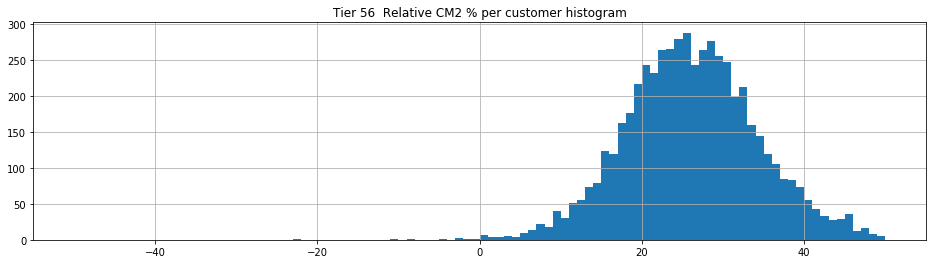

,CM2_REL
count,5551.00
mean,26.23
std,8.32
min,-22.79
25%,20.68
50%,25.95
75%,31.42
max,60.14


CM2% threshold >= 5  is the percentile 0.56
CM2% threshold >= 7  is the percentile 0.95
CM2% threshold >=  21.86  is the percentile 30 allowing us to stay with the 70% of our sample


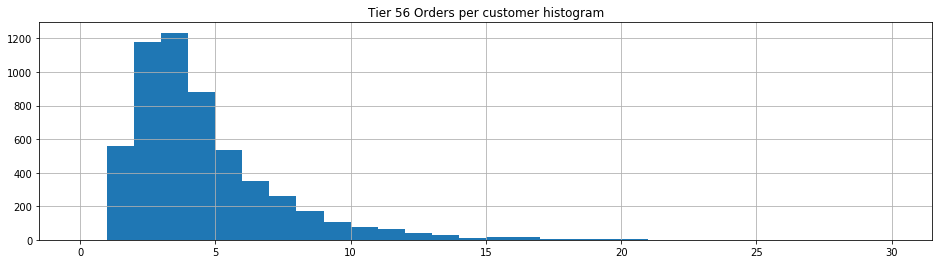

,ORDERS
count,5551.00
mean,4.06
std,2.80
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,44.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  89.62  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  89.3  % from our customers
With CM2% threshold >=  21.86  and Orders >=  2.0  we keep eligible a  62.75  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,2775.0,93.603192,42.398170,29.800475,66.389740,84.099933,108.405608,522.51225
52,2350.0,108.699583,52.265990,33.442586,74.808283,96.145314,126.968380,774.26084
53,2198.0,99.386668,46.100602,30.360400,69.570138,90.528692,117.508525,868.68860
54,2862.0,115.670657,58.927951,32.136860,77.652365,101.507482,137.386717,997.81110
55,158.0,84.148141,29.454874,34.919229,61.790910,80.666575,100.179963,185.44750
56,2383.0,97.935979,46.437715,29.664286,68.991637,88.886967,114.086131,749.26900


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,2775.0,26.618123,6.380419,-0.85,22.4700,26.430,30.7100,51.39
52,2350.0,26.186426,6.699249,-17.09,21.6250,26.230,30.7575,57.20
53,2198.0,30.336902,7.189013,5.93,25.6425,30.485,35.1675,58.33
54,2862.0,27.577652,7.614230,4.85,22.3025,27.310,32.5400,60.06
55,158.0,27.830190,7.058304,-0.12,23.7175,27.695,31.8100,46.28
56,2383.0,26.061070,7.540349,-4.96,20.8500,25.830,30.8400,55.65


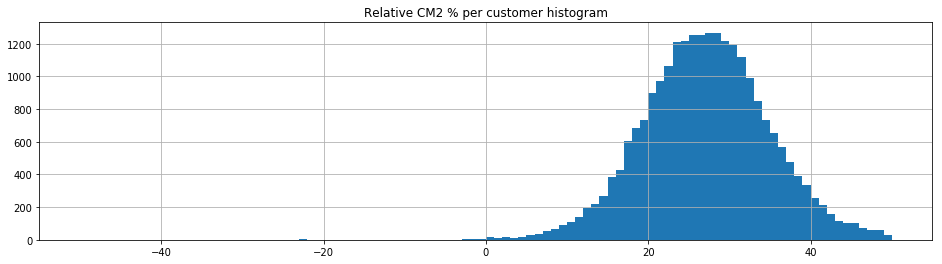

,CM2_REL
count,24337.00
mean,27.17
std,9.64
min,-824.28
25%,22.07
50%,27.11
75%,32.18
max,69.97


CM2% threshold >= 5  is the percentile 0.4
CM2% threshold >= 6  is the percentile 0.53
CM2% threshold >= 7  is the percentile 0.69
CM2% threshold >= 8  is the percentile 0.91
CM2% threshold >= 9  is the percentile 1.18
CM2% threshold >= 10  is the percentile 1.57
CM2% threshold >= 11  is the percentile 2.01
CM2% threshold >= 12  is the percentile 2.59
CM2% threshold >= 13  is the percentile 3.39
CM2% threshold >= 14  is the percentile 4.27
CM2% threshold >= 15  is the percentile 5.39
CM2% threshold >= 16  is the percentile 6.96
CM2% threshold >= 17  is the percentile 8.7
CM2% threshold >= 18  is the percentile 11.18
CM2% threshold >= 19  is the percentile 13.99
CM2% threshold >= 20  is the percentile 17.0
CM2% threshold >= 21 is the percentile 20.7
CM2% threshold >= 22  is the percentile 24.7
CM2% threshold >= 23  is the percentile 29.08
CM2% threshold >= 24  is the percentile 34.04
CM2% threshold >= 25  is the percentile 39.04
CM2% threshold >=  23.2  is the percentile 30 allowing us 

In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= 11  is the percentile', stats.percentileofscore(data['CM2_REL'], 11, kind='strict').round(2))
print('CM2% threshold >= 12  is the percentile', stats.percentileofscore(data['CM2_REL'], 12, kind='strict').round(2))
print('CM2% threshold >= 13  is the percentile', stats.percentileofscore(data['CM2_REL'], 13, kind='strict').round(2))
print('CM2% threshold >= 14  is the percentile', stats.percentileofscore(data['CM2_REL'], 14, kind='strict').round(2))
print('CM2% threshold >= 15  is the percentile', stats.percentileofscore(data['CM2_REL'], 15, kind='strict').round(2))
print('CM2% threshold >= 16  is the percentile', stats.percentileofscore(data['CM2_REL'], 16, kind='strict').round(2))
print('CM2% threshold >= 17  is the percentile', stats.percentileofscore(data['CM2_REL'], 17, kind='strict').round(2))
print('CM2% threshold >= 18  is the percentile', stats.percentileofscore(data['CM2_REL'], 18, kind='strict').round(2))
print('CM2% threshold >= 19  is the percentile', stats.percentileofscore(data['CM2_REL'], 19, kind='strict').round(2))
print('CM2% threshold >= 20  is the percentile', stats.percentileofscore(data['CM2_REL'], 20, kind='strict').round(2))
print('CM2% threshold >= 21 is the percentile', stats.percentileofscore(data['CM2_REL'], 21, kind='strict').round(2))
print('CM2% threshold >= 22  is the percentile', stats.percentileofscore(data['CM2_REL'], 22, kind='strict').round(2))
print('CM2% threshold >= 23  is the percentile', stats.percentileofscore(data['CM2_REL'], 23, kind='strict').round(2))
print('CM2% threshold >= 24  is the percentile', stats.percentileofscore(data['CM2_REL'], 24, kind='strict').round(2))
print('CM2% threshold >= 25  is the percentile', stats.percentileofscore(data['CM2_REL'], 25, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

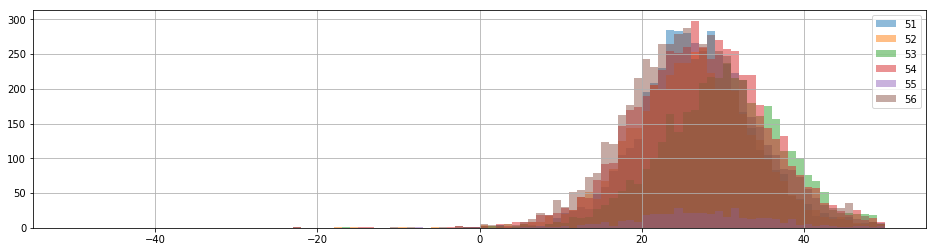

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56])
plt.show()   